In [24]:
import pandas as pd

In [25]:
df = pd.read_csv('/Users/syc/Downloads/sales_data.csv')
df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


In [75]:
#Get info on data and perform data cleaning
df.info()
df.isnull().sum()
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df

<class 'pandas.core.frame.DataFrame'>
Index: 651 entries, 2 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     651 non-null    object 
 1   Region      651 non-null    object 
 2   Price       651 non-null    float64
 3   Units Sold  651 non-null    float64
 4   Sale Date   651 non-null    object 
dtypes: float64(2), object(3)
memory usage: 30.5+ KB


,Product,Region,Price,Units Sold,Sale Date
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
5,Product_45,Region_1,8.63,11.0,2022-01-06
6,Product_31,Region_3,23.73,6.0,2022-01-07
...,...,...,...,...,...
985,Product_40,Region_7,144.37,5.0,2024-09-12
993,Product_7,Region_9,128.51,17.0,2024-09-20
994,Product_1,Region_4,95.24,7.0,2024-09-21
998,Product_2,Region_10,43.44,15.0,2024-09-25


Text(0.5, 1.0, 'Total Units Sold across different regions')

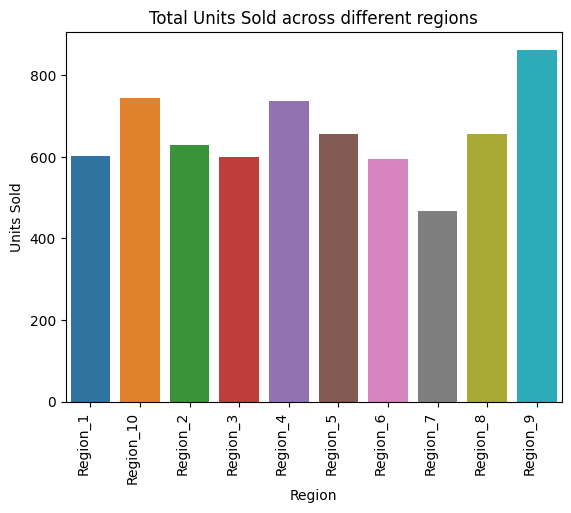

In [78]:

import seaborn as sns
import matplotlib.pyplot as plt

#Generate the sum of total units sold for each region and display them on a bargraph
compare_region_unitsold = df.groupby('Region')['Units Sold'].sum().reset_index()
p = sns.barplot(x="Region",y="Units Sold",data=compare_region_unitsold)
p.set_xticklabels(p.get_xticklabels(), rotation=90, ha='right')
plt.title("Total Units Sold across different regions")

Text(0.5, 1.0, 'Units Sold across different regions')

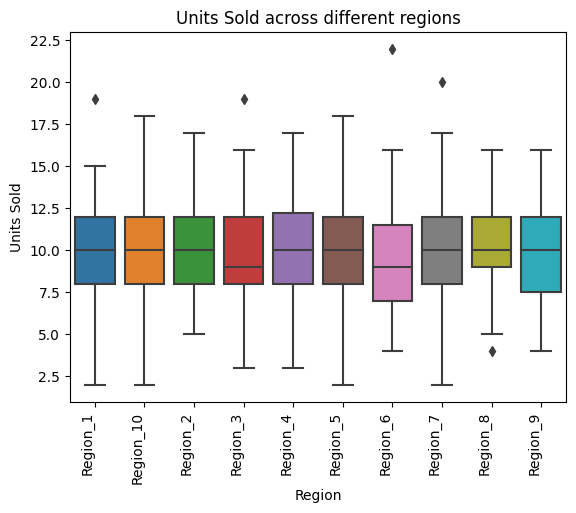

In [77]:

p2 = sns.boxplot(data = df, x ="Region", y="Units Sold")
p2.set_xticklabels(p.get_xticklabels(), rotation=90, ha='right')
plt.title("Units Sold across different regions")

Text(0.5, 1.0, 'Top 10 Best Selling Products')

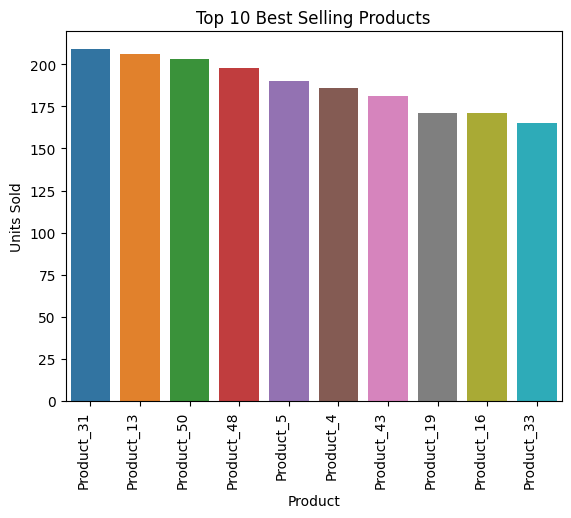

In [94]:

p2 = df.groupby('Product')['Units Sold'].sum().reset_index()
sorted = p2.sort_values('Units Sold', ascending=False)
p3 = sorted.head(10)
plot = sns.barplot(x="Product",y="Units Sold",data=p3)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, ha='right')
plt.title("Top 10 Best Selling Products")

Text(0.5, 1.0, '10 Least Favorite Products')

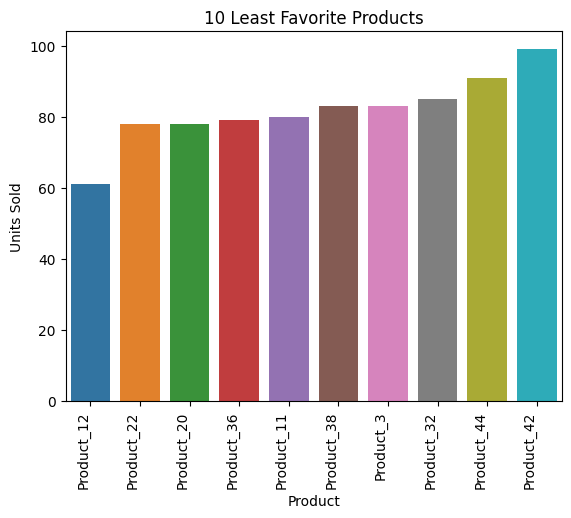

In [152]:
p2 = df.groupby('Product')['Units Sold'].sum().reset_index()
sorted = p2.sort_values('Units Sold', ascending=True)
p3 = sorted.head(10)
plot = sns.barplot(x="Product",y="Units Sold",data=p3)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, ha='right')
plt.title("10 Least Favorite Products")

Text(0.5, 1.0, 'Total Units Sold Across different year')

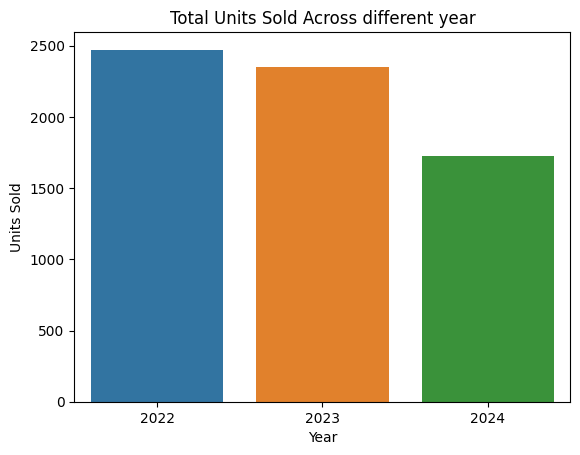

In [150]:

import matplotlib.pyplot as plt
df['year']= pd.to_datetime(df['Sale Date'])
f = df['year'].dt.year
df["Year"] = f
df
trend = df.groupby('Year')['Units Sold'].sum().reset_index()
sns.barplot(x="Year",y="Units Sold", data=trend)
plt.title("Total Units Sold Across different year")

1. Base on the above plots and calculations, it is clear to conclude that among the 10 different regions. Region 9 has the highest number of total sales, meaning that Region 9 has the highest sales performance. Whereas region 7 has the lowest number of sales, meaning that Region 7 is not performing as well. From the total units sold across different region plot, we can also tell that region 1,2,3,5,6 and 8 have similar height bars, indicating that these regions have a similar preformance. In terms of sales performance for various products, I have generated a histogram which shows the top 10 best selling products. It is evident that Product 31 is the most popular product since it has the highest number of sales. I have also constructed a plot for 10 least favorite products and we can see that product 12 has the lowest number of sales. Lastly, the number of sales are decreasing every year according to the trend displayed on the plot for total units sold across different year.

2. According the results of each plot, I will recommend that the company put continue effort into the product development process of their 10 best selling products, espeically into product 31, 50, 13 and 48. Since these products contribute a lot to the total number of sales. More specifically, company need to ensure that these top performaning products have quality and performance that meets and exceed the customer's expectations and keep making improvements on these products to ensure realibaility and customer overall satisfication. In terms of regional performance, since Region 9 is the best performing region with the highest number of sales. I will recommend that the company enhance customer service in Region 9 to keep building stronger relationship with the customers in Region 9. On the other hand, Region 7 has the lowest number of sales, the company can start collecting some feedback and opinions from customers in that region to see what kind of issue exists in Region 7 and what actions can be taken to address the issue. 

3. In terms of cleaning technique, I dropped all the duplicates and I also dropped all the rows with missing values. In my opinion, I dont think it is very suitable to fill the missing values with the mean value because it could lead to potential bias and inaccuracy, especially for data columns like price and units sold. I want to focus more on the remaining data so I can perform a more reliable analysis. I also did not remove any outliers because they dont seem to be an error. Base on the boxplot, we can already see some outliers that some regions have a very high number of units sold on a certain date. I think that is totally resonable because there are chances that some customers might purchase a lot or it could be a business related purchase. 